In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
#importing dataset into python environment
D=pd.read_excel('Dataset_w6.xlsx')
D.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


In [132]:
#checking for null values
D.isna().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

In [133]:
#columns
D.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'GDP per capita (current US$)',
       'Agricultural production index ',
       'International trade: Imports (million US$)'],
      dtype='object')

# 1.Number of countries

In [58]:
C=D['country'].count()
print('Number of countries = ',C)

Number of countries =  196


# 2.Visualizations

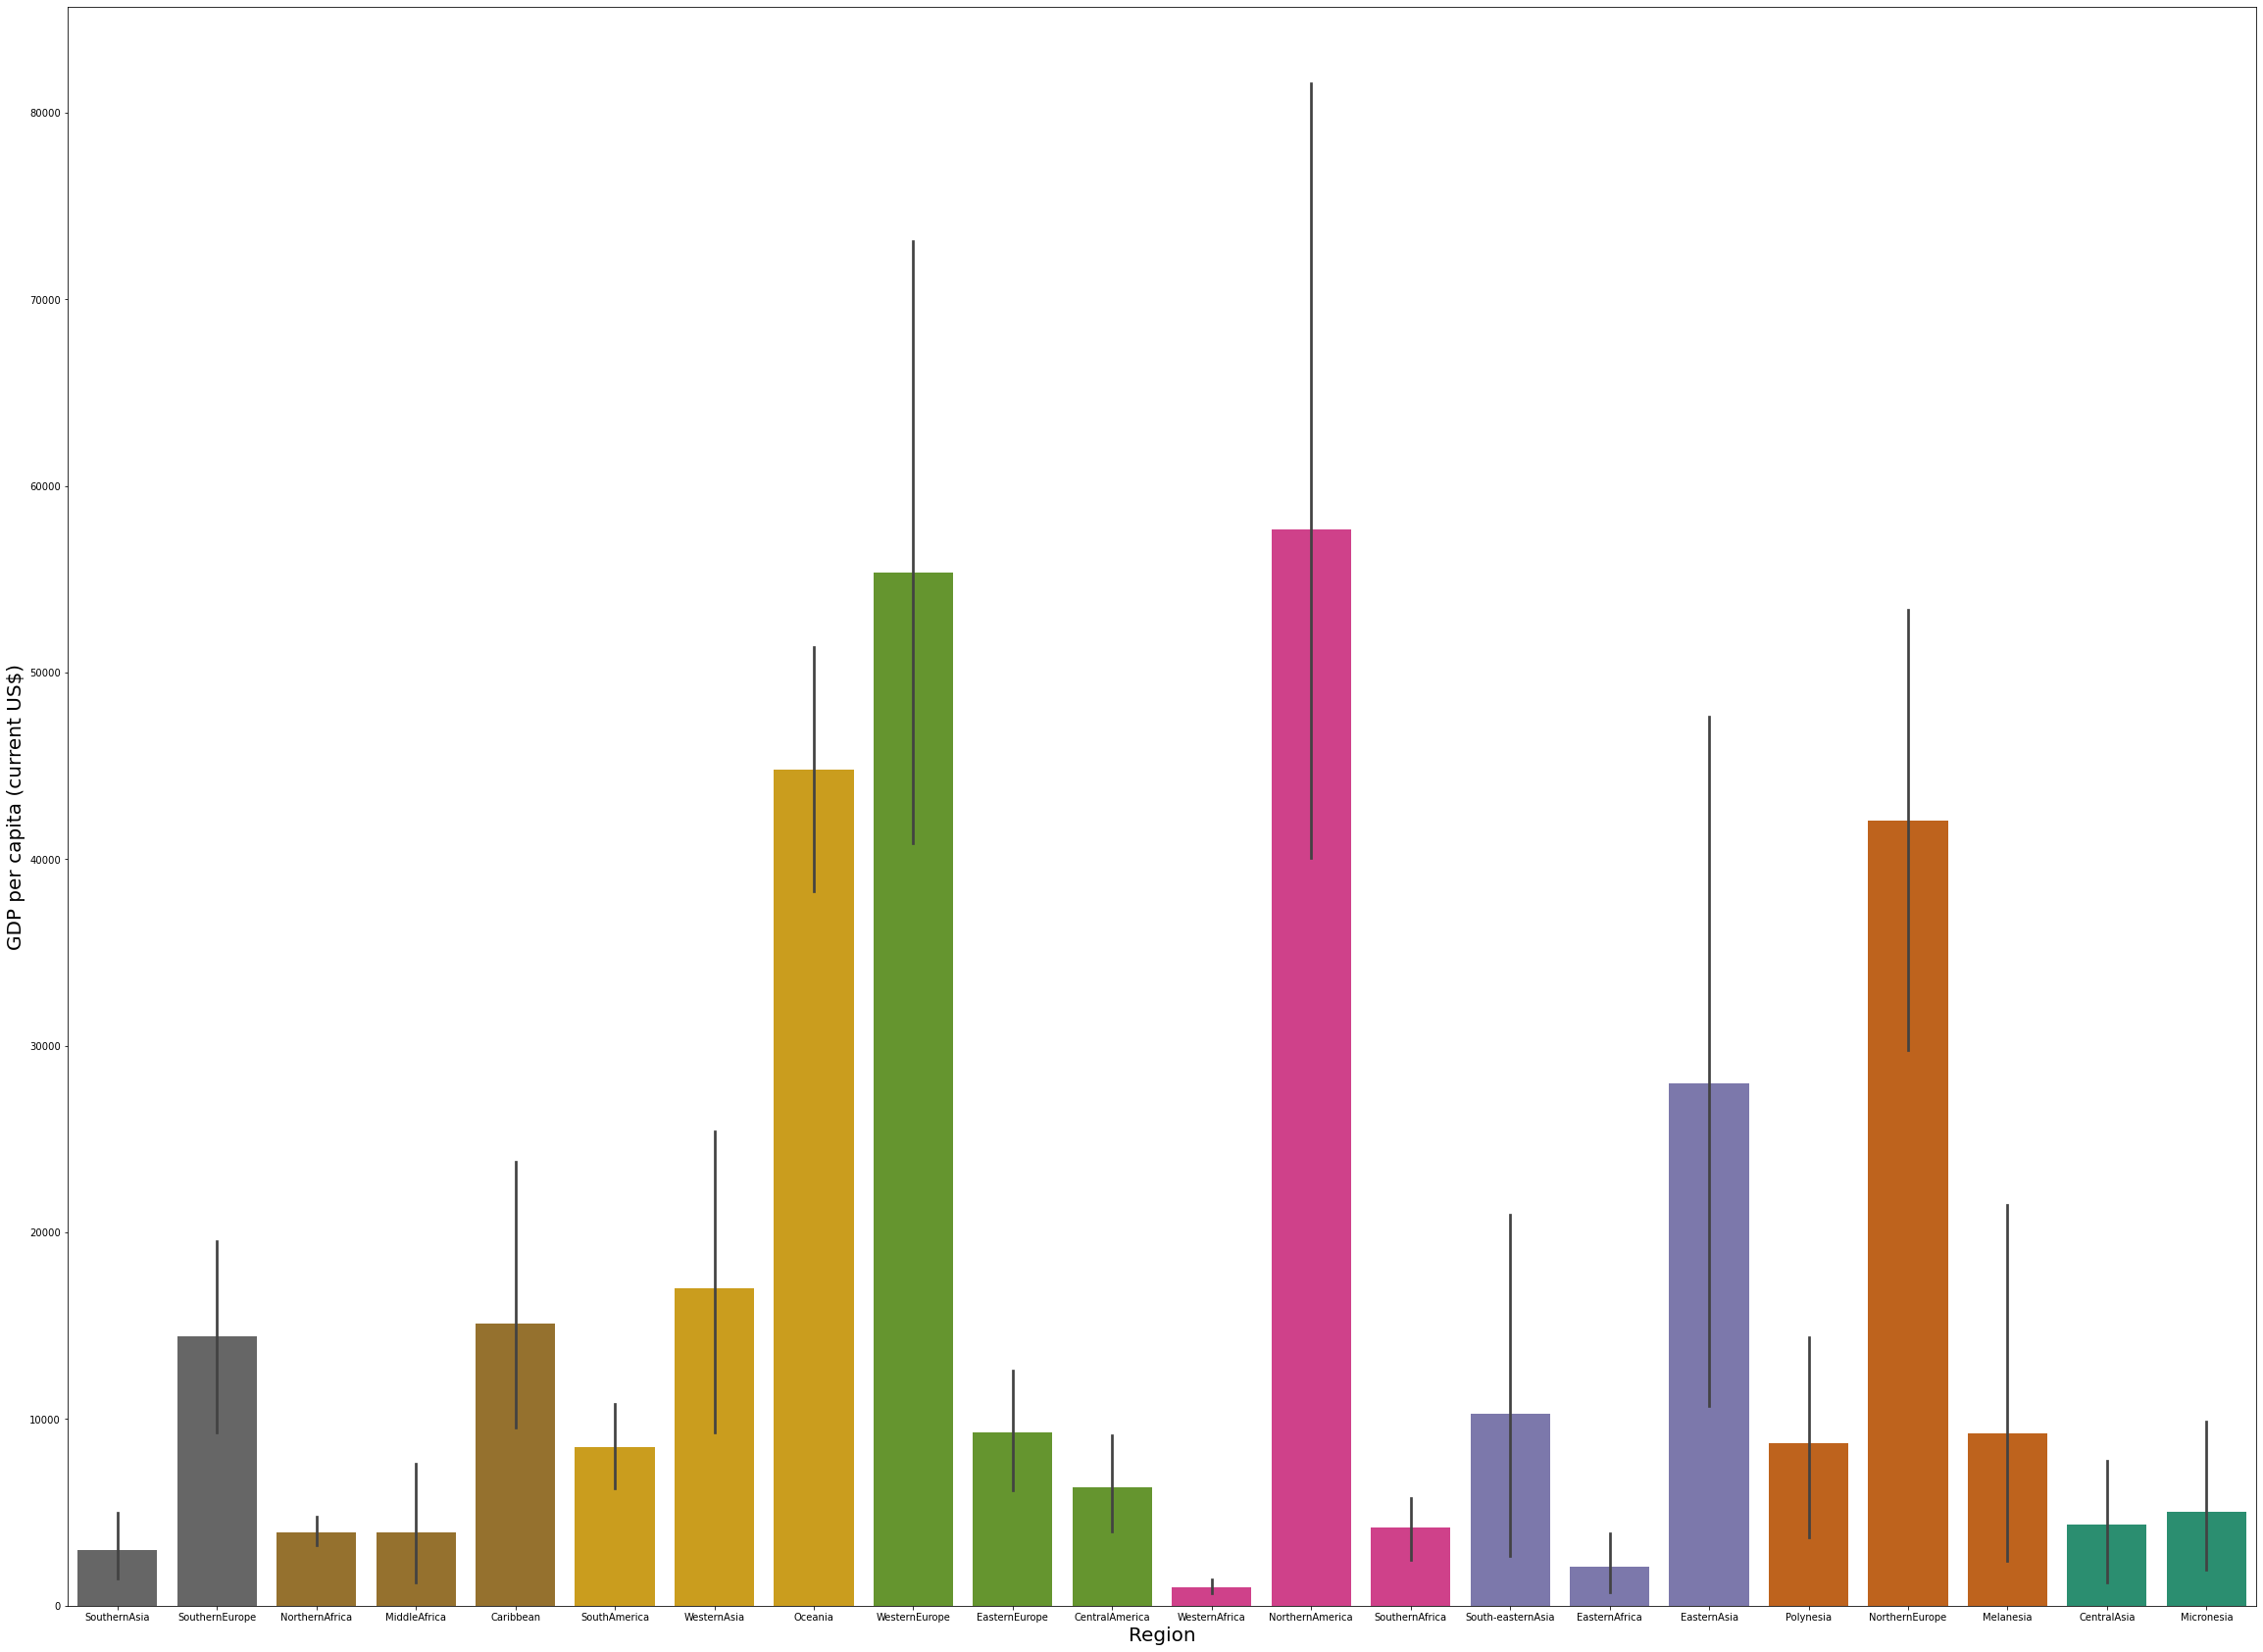

In [89]:
#Region vs GDP per capita (current US$)
plt.figure(figsize=(40,30))
sns.barplot(y='GDP per capita (current US$)',x='Region',data=D,palette='Dark2_r')
plt.xlabel('Region',fontsize=20)
plt.ylabel('GDP per capita (current US$)',fontsize=20)
plt.show()

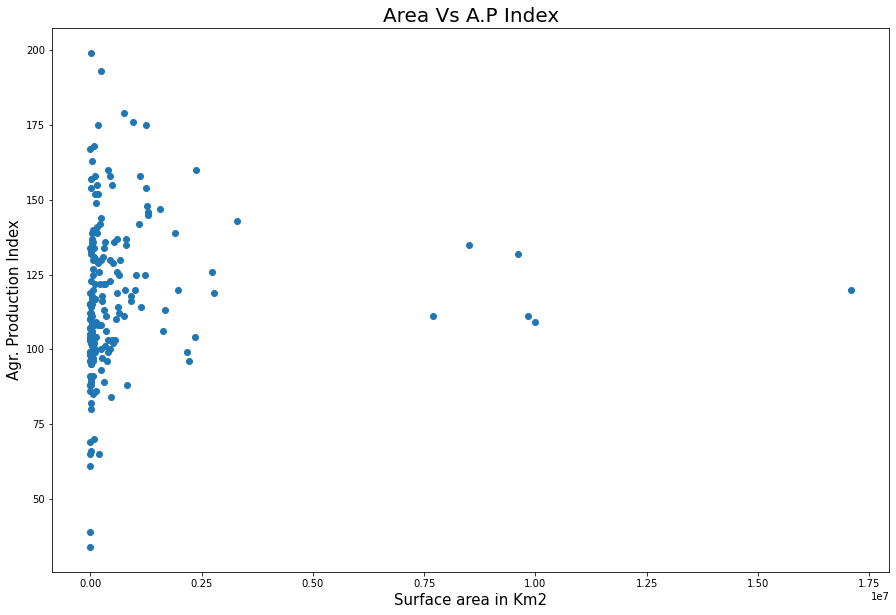

In [90]:
#Surface area vs Agricultural production index
plt.figure(figsize=(15,10))
plt.scatter("Surface area (km2)","Agricultural production index ",data=D)
plt.xlabel("Surface area in Km2", fontsize='15')
plt.ylabel("Agr. Production Index", fontsize='15')
plt.title("Area Vs A.P Index", fontsize='20')
plt.show()

<AxesSubplot:xlabel='country', ylabel='Population in thousands (2017)'>

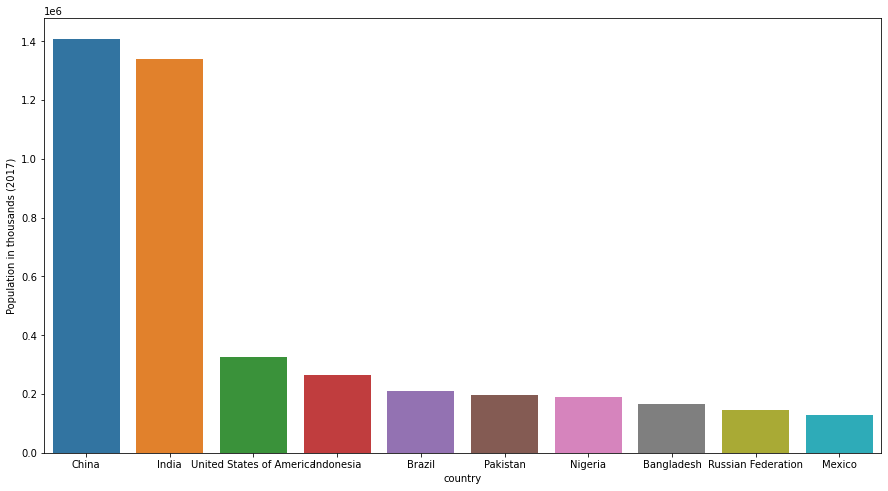

In [94]:
# Top 10 countries by Population
plt.figure(figsize=(15,8))
P = D[['country', 'Population in thousands (2017)']]
P = P.sort_values('Population in thousands (2017)', ascending=False)
P=P.head(10)
sns.barplot(x="country",y="Population in thousands (2017)",data=P)

# 3. No: of Countries w.r.t to Region

In [48]:
r=D.groupby('Region')['country'].count().to_frame()
r.sort_values('country',ascending=False,inplace=True)
r

,country
Region,
WesternAsia,18
EasternAfrica,17
Caribbean,16
WesternAfrica,15
SouthernEurope,12
SouthAmerica,12
South-easternAsia,11
NorthernEurope,10
EasternEurope,10


WesternAsia (18) region consists of the largest number of countries followed by EasternAfrica (17) and Caribbean (16).

# 4.1 Region with average highest GDP percapita

In [96]:
d=D.groupby('Region')['GDP per capita (current US$)'].mean()
d=pd.DataFrame(d)
d=d.sort_values('GDP per capita (current US$)',ascending=False)
d

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.000000
WesternEurope,55387.128571
Oceania,44823.250000
NorthernEurope,42098.220000
EasternAsia,27967.614286
WesternAsia,17013.938889
Caribbean,15135.562500
SouthernEurope,14462.741667
South-easternAsia,10299.027273


NorthernAmerica have highest average GDP per capita = 57659.000000 US$

# 4.2 Region with average highest international trade : imports

In [100]:
t=D.groupby('Region')['International trade: Imports (million US$)'].mean()
t=pd.DataFrame(t)
t=t.sort_values('International trade: Imports (million US$)',ascending=False)
t

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.250000
EasternAsia,451995.000000
WesternEurope,407498.428571
NorthernEurope,113407.200000
Oceania,112914.500000
South-easternAsia,98324.636364
EasternEurope,85243.900000
SouthernEurope,76666.666667
SouthernAsia,58199.333333


NorthernAmerica have highest average international trade : imports = 663552.250000 million US$

# 5.Find out which region has more consistent with respect to GDP per capita

In [125]:
D1=D.groupby("Region")["GDP per capita (current US$)"]
D2=D1.describe()
D2

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Caribbean,16.0,15135.562500,14579.371326,793.7,6973.125,10243.60,16594.650,62132.0
CentralAmerica,8.0,6348.137500,4180.440883,2086.9,3558.100,4504.40,9489.425,13268.1
CentralAsia,5.0,4329.880000,4152.215490,925.9,1106.400,2308.30,6996.700,10312.1
EasternAfrica,17.0,2088.852941,3716.131770,144.5,529.200,877.30,1368.900,14133.2
EasternAsia,7.0,27967.614286,27485.120923,648.0,6041.250,27396.70,38529.850,78586.4
EasternEurope,10.0,9292.490000,5415.488739,1591.4,6024.800,9182.00,12354.275,17561.7
Melanesia,5.0,9261.960000,13855.842686,1841.6,2783.000,2797.60,4921.900,33965.7
Micronesia,4.0,5008.300000,4820.669694,1442.9,2622.125,3233.90,5620.075,12122.5
MiddleAfrica,9.0,3928.833333,5274.846281,333.2,713.000,1752.80,4714.100,16344.1


In [127]:
#Finding coefficient of variation
D3=D2['std']/D2['mean']*100
D3.sort_values()

Region
Oceania               20.599420
NorthernAfrica        24.770432
NorthernAmerica       44.658457
WesternEurope         44.722426
NorthernEurope        49.101910
SouthAmerica          50.280241
SouthernAfrica        51.946638
EasternEurope         58.278123
CentralAmerica        65.853030
SouthernEurope        65.974374
Polynesia             80.080979
WesternAfrica         80.452395
CentralAsia           95.896780
SouthernAsia          96.203617
Micronesia            96.253613
Caribbean             96.325269
EasternAsia           98.274814
WesternAsia          110.569055
MiddleAfrica         134.259864
Melanesia            149.599466
South-easternAsia    158.382051
EasternAfrica        177.902987
dtype: float64

Oceania have the lowest coefficient of variation therefor the most consistent